<a href="https://colab.research.google.com/github/kamillyruseler/Projeto_IA/blob/main/Projeto_de_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tf-nightly

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib


BASE_DIR = "/content/drive/My Drive/celulas"
BASE_DIR = pathlib.Path(BASE_DIR)



In [ ]:
image_count = len(list(BASE_DIR.glob('*/*.jpg')))
print(image_count)

72


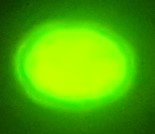

In [ ]:
normal = list(BASE_DIR.glob('normal/*'))
PIL.Image.open(str(normal[0]))

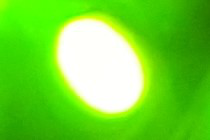

In [ ]:
PIL.Image.open(str(normal[1]))

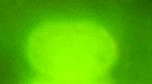

In [ ]:
vacuolated = list(BASE_DIR.glob('vacuolated/*'))
PIL.Image.open(str(vacuolated[0]))

In [ ]:
batch_size = 35
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  BASE_DIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 82 files belonging to 2 classes.
Using 66 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  BASE_DIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 82 files belonging to 2 classes.
Using 16 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['normal', 'vacuolated']


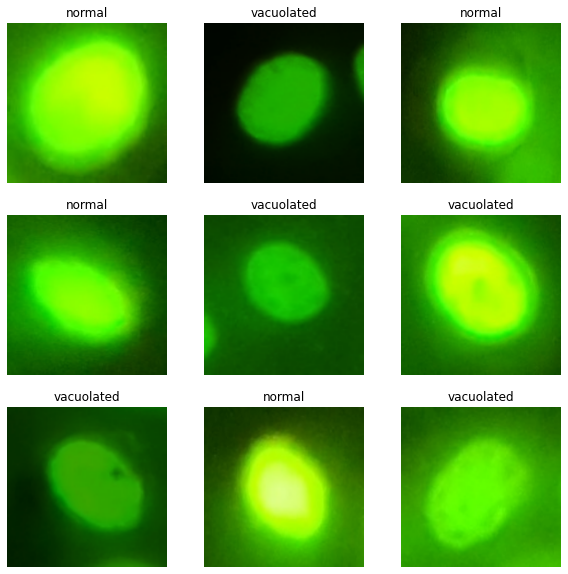

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
IMG_SHAPE = 180
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
2/2 [==============================] - 3s 1s/step - loss: 25.3357 - accuracy: 0.2306 - val_loss: 238.6597 - val_accuracy: 0.6250
Epoch 2/15
2/2 [==============================] - 2s 1s/step - loss: 237.8901 - accuracy: 0.4947 - val_loss: 25.0700 - val_accuracy: 0.6875
Epoch 3/15
2/2 [==============================] - 2s 1s/step - loss: 28.9899 - accuracy: 0.5888 - val_loss: 98.6660 - val_accuracy: 0.3750
Epoch 4/15
2/2 [==============================] - 2s 1s/step - loss: 39.0103 - accuracy: 0.5363 - val_loss: 27.7667 - val_accuracy: 0.4375
Epoch 5/15
2/2 [==============================] - 2s 1s/step - loss: 6.2283 - accuracy: 0.6601 - val_loss: 8.0030 - val_accuracy: 0.6250
Epoch 6/15
2/2 [==============================] - 2s 1s/step - loss: 11.8370 - accuracy: 0.6332 - val_loss: 4.7633 - val_accuracy: 0.7500
Epoch 7/15
2/2 [==============================] - 2s 1s/step - loss: 2.2601 - accuracy: 0.6911 - val_loss: 4.5137 - val_accuracy: 0.6250
Epoch 8/15
2/2 [==============

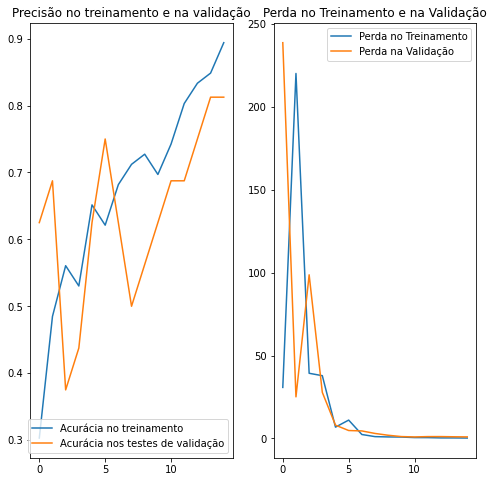

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia no treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia nos testes de validação')
plt.legend(loc='lower right')
plt.title('Precisão no treinamento e na validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda no Treinamento')
plt.plot(epochs_range, val_loss, label='Perda na Validação')
plt.legend(loc='upper right')
plt.title('Perda no Treinamento e na Validação')
plt.show()

In [ ]:
path = "/content/drive/My Drive/Aa_9.4-5.jpg"

img = keras.preprocessing.image.load_img(
    path, target_size=(180, 180)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to normal with a 100.00 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Screenshot from 2020-09-08 14-49-52.png"

img = keras.preprocessing.image.load_img(
    path, target_size=(180, 180)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to vacuolated with a 100.00 percent confidence.
